In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.impute  import SimpleImputer
from sklearn.compose import ColumnTransformer

In [19]:
df=pd.read_csv('data/titanic_toy.csv')
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [21]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [22]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
x_train.isnull().sum()

Age       140
Fare       36
Family      0
dtype: int64

In [25]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()


In [26]:
x_train['Age_median']=x_train['Age'].fillna(median_age)
x_train['Age_mean']=x_train['Age'].fillna(mean_age)

x_train['Fare_median']=x_train['Fare'].fillna(median_age)
x_train['Fare_mean']=x_train['Fare'].fillna(mean_age)

x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
392,28.0,7.9250,2,28.0,28.0,7.9250,7.9250
504,16.0,86.5000,0,16.0,16.0,86.5000,86.5000
222,51.0,8.0500,0,51.0,51.0,8.0500,8.0500
641,24.0,69.3000,0,24.0,24.0,69.3000,69.3000
762,20.0,7.2292,0,20.0,20.0,7.2292,7.2292


In [27]:
print("Original Age Variable variance:",x_train['Age'].var())
print("Age Variance Before median imputation:",x_train['Age_median'].var())
print("Age Variance Before mean imputation:",x_train['Age_mean'].var())

print("Original Fare Variable variance:",x_train['Fare'].var())
print("Fare Variance Before median imputation:",x_train['Fare_median'].var())
print("Fare Variance Before mean imputation:",x_train['Fare_mean'].var())

Original Age Variable variance: 210.2517072477435
Age Variance Before median imputation: 169.20731007048155
Age Variance Before mean imputation: 168.85193366872227
Original Fare Variable variance: 2761.0314349486343
Fare Variance Before median imputation: 2622.2135607276864
Fare Variance Before mean imputation: 2621.6705110298376


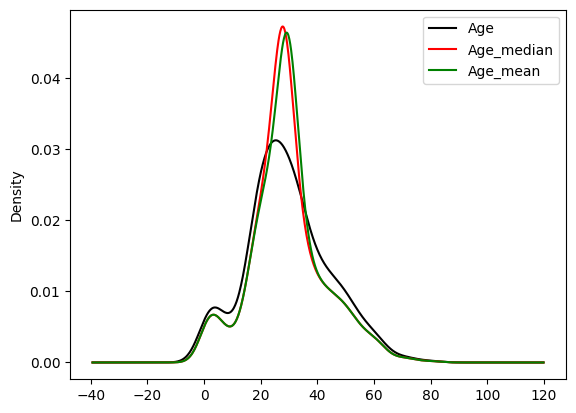

In [28]:
fig=plt.figure()
ax=fig.add_subplot()

x_train['Age'].plot(kind='kde',ax=ax,color='black')
x_train['Age_median'].plot(kind='kde',ax=ax,color='red')
x_train['Age_mean'].plot(kind='kde',ax=ax,color='green')

lines,lables=ax.get_legend_handles_labels()
ax.legend(lines,lables,loc='best')

plt.show()

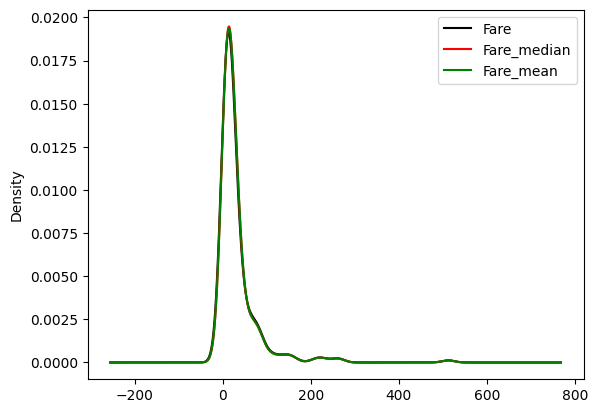

In [29]:
fig=plt.figure()
ax=fig.add_subplot()

x_train['Fare'].plot(kind='kde',ax=ax,color='black')
x_train['Fare_median'].plot(kind='kde',ax=ax,color='red')
x_train['Fare_mean'].plot(kind='kde',ax=ax,color='green')

lines,lables=ax.get_legend_handles_labels()
ax.legend(lines,lables,loc='best')

plt.show()

In [30]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.916562,71.008529
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.661074,17.659866
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,60.458269,60.538695
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.952682,57.026540
Fare_median,70.916562,2761.031435,17.661074,60.458269,56.952682,2622.213561,2621.888037
Fare_mean,71.008529,2761.031435,17.659866,60.538695,57.026540,2621.888037,2621.670511


In [31]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088561,0.088692
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204985,0.204992
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.090764,0.090894
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.085591,0.085711
Fare_median,0.088561,1.000000,0.204985,0.090764,0.085591,1.000000,0.999979
Fare_mean,0.088692,1.000000,0.204992,0.090894,0.085711,0.999979,1.000000


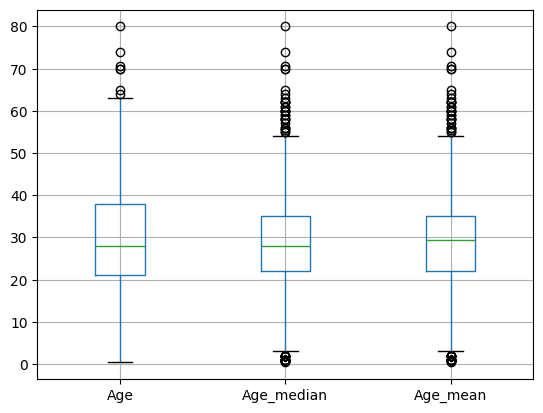

In [32]:
x_train[['Age','Age_median','Age_mean']].boxplot()
plt.show()

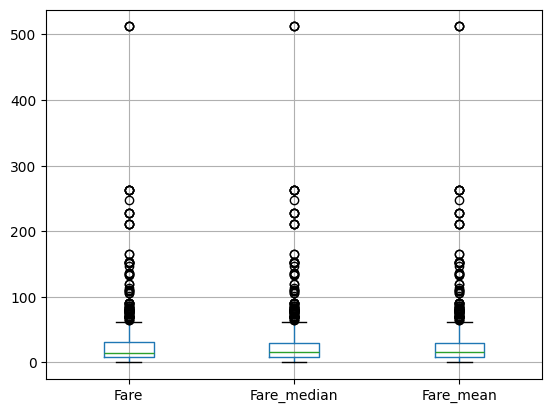

In [33]:
x_train[['Fare','Fare_median','Fare_mean']].boxplot()
plt.show()

In [34]:
# Using Sklearn

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
imputer1=SimpleImputer(strategy="median")
imputer2=SimpleImputer(strategy="mean")

In [36]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
])

In [37]:
trf.fit(x_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [40]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [41]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])

In [42]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [44]:
x_train

array([[ 45.5       ,  28.5       ],
       [ 23.        ,  13.        ],
       [ 32.        ,   7.925     ],
       ...,
       [ 41.        ,  32.51778772],
       [ 14.        , 120.        ],
       [ 21.        ,  77.2875    ]], shape=(712, 2))